## Detecting Languages with Python: A Step-by-Step Guide 

Language detection is a key tool in text analytics, enabling researchers to classify documents, messages, and other textual data into their respective languages. With the rise of social media and globalization, detecting languages in multilingual datasets is essential for insights in fields like social sciences, marketing, and natural language processing (NLP). In this tutorial, we will explore how to perform language detection using Python and the langdetect library in a Jupyter Notebook environment.

## Learning Objectives 
By the end of this tutorial, you will be able to:

- Understand the basics of language detection.
- Set up a Python environment for language detection tasks.
- Implement a simple language detection tool using Python libraries.
- Evaluate the detected languages for datasets and real-world use cases.

## Target Audience

This tutorial is designed for:

- Researchers in social sciences and linguistics interested in multilingual data analysis.
- Students or professionals beginning their journey in NLP.
- Data analysts working with diverse language datasets.
- Anyone curious about language detection tools in Python.

*Basic knowledge of python (https://www.python.org/) programming is required for this tutorial* 

## Duration
30 mins

## Use Cases

- *Survey Analysis:* Determine the primary languages in multilingual survey responses.

- *Media Studies:* Analyze the distribution of languages in social media posts or news articles.


## Environment Setup

This tutorial works on Jupyter with Python 3.7 or higher
Use the following command to install the required packages and set up the environment.

In [1]:
!pip install -r requirements.txt
# It mainly uses langdetect to detect languages, while pandas helps with reading/writing the data, and matplotlib with the plots.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


## Input Data

The tutorial facilitates working with multilingual textual data coming from social media, as survey responses or news articles. You may either;

- Read a small multilingual dataset `data/input.tsv` file as input
- Or provide input text directly through the notebook for a quick check 


Step-by-step process

## 1. Import Required Libraries

In [2]:
from langdetect import detect, detect_langs
from langdetect.lang_detect_exception import LangDetectException
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

- langdetect is a simple and lightweight language detection tool. 
- It is built on Google's language-detection library from Java to Python
- It supports the detection of *over 50 languages*.
- It uses statistical features and, therefore, may either return the most probable language or a list of languages with probabilities (of course, the longer the text, the better the detection)


## 2. Define a Language Detection Function

  Create a function to detect languages in user-provided text:

In [3]:
def detect_language(text):
    """
    Detect the language of the given text.
    Args:
        text (str): The text to analyze.
    Returns:
        str: The detected language code (e.g., 'en' for English, 'fr' for French).
    """
    try:
        return detect(text)
    except LangDetectException:
        return "Unknown"


In [4]:
def detect_languages_with_prob(text):
    """
    Detect the language of the given text.
    Args:
        text (str): The text to analyze.
    Returns:
        str: The detected language code (e.g., 'en' for English, 'fr' for French).
    """
    try:
        return detect_langs(text)
    except LangDetectException:
        return "Unknown"


## 3. Provide Sample Texts or User Input

  Create a list of sample texts and ask the user to provide their own input:

In [ ]:
# This cell displays sample multilingual texts, prompts the user for input, and prepares a list of texts for language detection.

# 1. Apply on sample text
sample_text = "Bonjour tout le monde!"  # French


# 2. If Reader wants their own input text. Uncomment this line please and proceed with your corpus/texts.
# sample_text = input("\nEnter your text for language detection (leave empty to use sample texts): ")

# 3. Read input texts from `data/input.tsv` file (for bulk detection)
df = pd.read_csv('data/input.tsv', sep='\t')


## 4. Detect Languages

  Detect the language for the sample text and user input text

In [ ]:
# 1. sample text
print(detect_language(sample_text), " : ", sample_text)

# 2. Input text
print(detect_language(sample_text), " : ", sample_text)


fr  :  Bonjour tout le monde!
ja  :  こんにちは お元気ですか


In [7]:
# 3. from dataset
df = pd.read_csv("data/input.tsv", sep="\t")

dict_lang = {"Text" : [], "Lang": []}
for text in df["Text"].tolist():
    lang = detect_language(text)
    print(lang, " : ", text)
    dict_lang["Text"].append(text)
    dict_lang["Lang"].append(lang)
df = pd.DataFrame(dict_lang)
df.to_csv("data/output_languages.tsv", sep="\t", index = False)

fr  :  Bonjour tout le monde!
es  :  Hola, ¿cómo estás?
en  :  Hello, how are you?
hi  :  नमस्ते, आप कैसे हैं?
zh-cn  :  你好，你怎么样？
fa  :  نن ټوله ورځ باران ورېده
de  :  Hallo, wie gehts?
pt  :  olá, como vai


## 5. Detect Languages Probabilities

language detection probabilities enhance the reliability and interpretability of automated language classification, making them essential for robust analysis in social science research.

In [ ]:
# 1. sample text
print(detect_languages_with_prob(sample_text), " : ", sample_text)

# 2. Input text
print(detect_languages_with_prob(sample_text), " : ", sample_text)

[fr:0.9999975732124085]  :  Bonjour tout le monde!
[ja:0.9999999999641599]  :  こんにちは お元気ですか


In [9]:
# 3. from dataset
df = pd.read_csv("data/input.tsv", sep="\t")

dict_lang_with_probs = {"Text" : [], "Lang with Prob" : []}
for text in df["Text"].tolist():
    langs_with_probs = detect_languages_with_prob(text)
    print(langs_with_probs, " : ", text)
    dict_lang_with_probs["Text"].append(text)
    dict_lang_with_probs["Lang with Prob"].append(langs_with_probs)
df = pd.DataFrame(dict_lang_with_probs)
df.to_csv("data/output_languages_with_probabilities.tsv", sep="\t", index = False)

[fr:0.9999965124596464]  :  Bonjour tout le monde!
[es:0.999996969254196]  :  Hola, ¿cómo estás?
[en:0.8571398641292957, so:0.1428577659323957]  :  Hello, how are you?
[hi:0.9999978803709011]  :  नमस्ते, आप कैसे हैं?
[zh-cn:0.9999964356180702]  :  你好，你怎么样？
[fa:0.9999973235017153]  :  نن ټوله ورځ باران ورېده
[de:0.9999949839774973]  :  Hallo, wie gehts?
[pt:0.9999960091013029]  :  olá, como vai


## 6.Visualize the Results

Create a bar chart to visualize the detected languages, Although this graph might not provide much insights given the small corpus we use, but might prove useful in discovering patterns when the corpus size is large. 

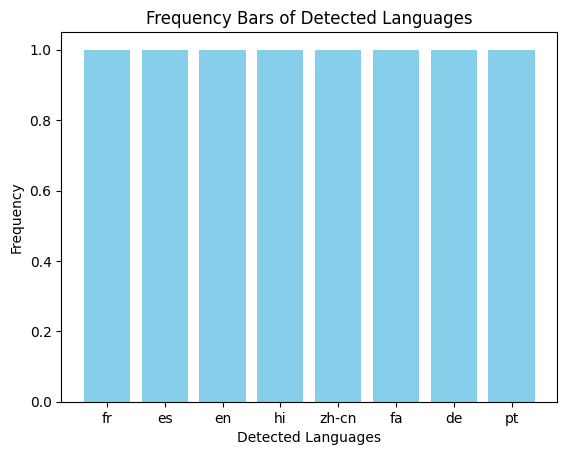

In [10]:
# This code visualizes the frequency of each detected language in the provided texts.
# It first counts how many times each language appears in the detected_languages list,
# then creates a bar chart using matplotlib to show the distribution of detected languages.

language_counts = {}
for lang in dict_lang["Lang"]:
    language_counts[lang] = language_counts.get(lang, 0) + 1

plt.bar(language_counts.keys(), language_counts.values(), color='skyblue')
plt.title('Frequency Bars of Detected Languages')
plt.xlabel('Detected Languages')
plt.ylabel('Frequency')
plt.show()


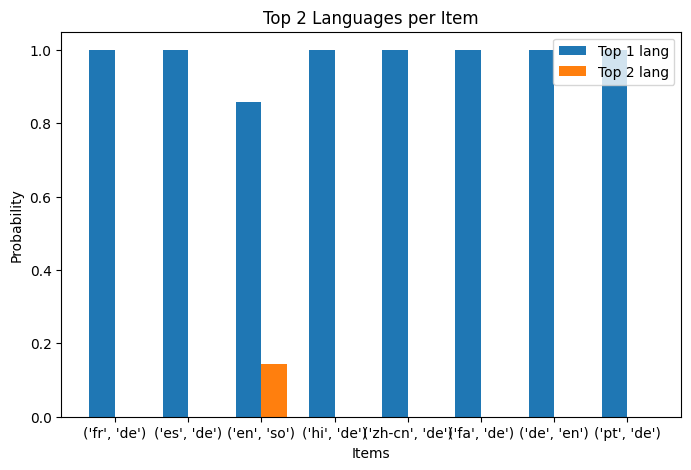

In [11]:
# Plot languages with their probabilities

unique_langs = []

for lang_with_prob in dict_lang_with_probs["Lang with Prob"]:
    for item in lang_with_prob:
        lang, prob = str(item).split(":")
        if lang not in unique_langs:
            unique_langs.append(lang)
            
unique_langs.sort()

results = []
for lang_with_prob in dict_lang_with_probs["Lang with Prob"]:
    tmp = {}
    for item in lang_with_prob:
        lang, prob = str(item).split(":")
        tmp[lang] = float(prob)
    for lang in unique_langs:
        if lang not in tmp.keys():
            tmp[lang] = 0.0
    results.append(tmp)

# Extract top 2 languages for each item
top_langs = []
top_probs = []

for d in results:
    sorted_items = sorted(d.items(), key=lambda x: x[1], reverse=True)[:2]
    langs, probs = zip(*sorted_items)
    top_langs.append(langs)
    top_probs.append(probs)

x = np.arange(len(results))  # positions for groups
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(2):  # for top 2 languages
    langs_i = [langs[i] for langs in top_langs]
    probs_i = [probs[i] for probs in top_probs]
    ax.bar(x + i*width, probs_i, width, label=f"Top {i+1} lang", tick_label=langs_i)

ax.set_xlabel("Items")
ax.set_ylabel("Probability")
ax.set_title("Top 2 Languages per Item")
ax.legend()

plt.xticks(x + width / 2, top_langs)
plt.show()


## Conclusion

In conclusion, this tutorial has equipped you with the skills to build a simple language detection tool using Python. This skill is foundational for processing multilingual datasets and paves the way for more advanced tasks in NLP and data analytics.

## References

- LangDetect Library Documentation: https://pypi.org/project/langdetect/
- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html

## Contact details
[Susmita.Gangopadhyay@gesis.org](mailto:Susmita.Gangopadhyay@gesis.org)

